In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2

In [3]:
def set_weights(network):
    '''
    Initialize weights.
    Returns a list of weight matrices.
    '''
    weights = []
    for i in range(1, len(network)):
        # Using small random values for initialization.
        weights.append(np.random.randn(network[i], network[i-1]) * 0.01)
    return weights

In [4]:
def set_bias(network):
    '''
    Initialize biases.
    Returns a list of bias vectors.
    '''
    biases = []
    for i in range(1, len(network)):
        biases.append(np.zeros((network[i], 1)))
    return biases


In [5]:
def softmax(z):
    '''
    Softmax activation for the output layer.
    '''
    exp_z = np.exp(z - np.max(z, axis=0, keepdims=True))
    return exp_z / np.sum(exp_z, axis=0, keepdims=True)

In [6]:
def g(z):
    '''
    Sigmoid activation for hidden layers.
    '''
    return 1 / (1 + np.exp(-z))

In [7]:
def prepare_data(X, y, network):
    '''
    Prepare training data.
    Flattens images and one-hot encoding labels.
    '''
    m = X.shape[0]
    # Flatten images:(m, 784)
    X_flat = X.reshape(m, -1)
    A0 = X_flat.T  # shape: (784, m)
    # One-hot encode labels:  (m, 10) transpose to (10, m)
    Y = np.eye(network[-1])[y].T
    return A0, Y, m

In [8]:
def feed_forward(A0, weights, biases, network):
    '''
    Feed-forward function.
    Uses sigmoid activations for hidden layers and softmax for the output layer.
    '''
    activations = [A0]
    A = A0
    L = len(weights)
    for layer_idx in range(L):
        Z = weights[layer_idx] @ A + biases[layer_idx]
        # Use softmax in the output layer
        if layer_idx == L - 1:
            A = softmax(Z)
        else:
            A = g(Z)
        activations.append(A)
    y_hat = A
    return y_hat, activations


In [9]:
def cost(y_hat, y):
    '''
    Categorical cross-entropy loss.
    '''
    m = y.shape[1]
    return -np.sum(y * np.log(y_hat + 1e-8)) / m

In [10]:
def backprop_layer_calculations(y_hat, Y, weights, biases, activations, network, m):
    '''
    Backpropagation calculations.
    For the output layer, derivative of the loss with softmax + cross-entropy is (y_hat - Y)/m.
    For hidden layers, we use the derivative of the sigmoid activation.
    Returns:
      dW: gradients with respect to weights
      db: gradients with respect to biases
    '''
    L = len(weights)
    dW = [None] * L
    db = [None] * L
    dA = [None] * (L + 1)  # Gradients for activations

    # Output layer gradient: derivative of cost wrt Z (softmax + cross-entropy)
    dA[L] = (y_hat - Y) / m

    for layer in reversed(range(L)):
        A_curr = activations[layer + 1]
        A_prev = activations[layer]

        # For hidden layers, derivative of sigmoid: A*(1-A)
        if layer == L - 1:
            dZ = dA[layer + 1]
        else:
            dZ = dA[layer + 1] * (A_curr * (1 - A_curr))

        dW[layer] = dZ @ A_prev.T
        db[layer] = np.sum(dZ, axis=1, keepdims=True)
        if layer > 0:
            dA[layer] = weights[layer].T @ dZ

    return dW, db


In [11]:
def update_parameters(weights, biases, dWs, dbs, learning_rate):
    '''
    Update parameters using gradient descent.
    '''
    L = len(weights)
    for i in range(L):
        weights[i] -= learning_rate * dWs[i]
        biases[i] -= learning_rate * dbs[i]
    return weights, biases

In [18]:
def train():
    global weights, biases  # Use global variables for updates

    epochs = 20  #
    alpha = 0.5  #
    costs = []   #

    for e in range(epochs):
        # Feed-forward
        y_hat, activations = feed_forward(A0, weights, biases, network)

        # Compute cost
        error = cost(y_hat, Y)
        costs.append(error)

        # Backpropagation
        dW, db = backprop_layer_calculations(y_hat, Y, weights, biases, activations, network, m)

        # Update parameters
        weights, biases = update_parameters(weights, biases, dW, db, alpha)

        # if e % 20 == 0:
        #   print(f"Epoch {e}: Cost = {error:.6f}")
        print(f"Epoch {e}: Cost = {error:.6f}")
    return costs



In [19]:
mnist = tf.keras.datasets.mnist

In [20]:
# The input is 28x28 flattened image
#Output layer: 10 neurons (one per digit)

In [21]:
#Loading MNIST data
(X_train, y_train), (_, _) = mnist.load_data()
X_train = X_train.astype(np.float32) / 255.0

network = [784,128,128, 10]

In [22]:
A0, Y, m = prepare_data(X_train, y_train, network)

# Initialize weights and biases
weights = set_weights(network)
biases = set_bias(network)

# Train the model and capture cost history
costs = train()

Epoch 0: Cost = 2.303973
Epoch 1: Cost = 2.302383
Epoch 2: Cost = 2.301742
Epoch 3: Cost = 2.301460
Epoch 4: Cost = 2.301346
Epoch 5: Cost = 2.301271
Epoch 6: Cost = 2.301236
Epoch 7: Cost = 2.301210
Epoch 8: Cost = 2.301195
Epoch 9: Cost = 2.301184
Epoch 10: Cost = 2.301177
Epoch 11: Cost = 2.301171
Epoch 12: Cost = 2.301168
Epoch 13: Cost = 2.301165
Epoch 14: Cost = 2.301162
Epoch 15: Cost = 2.301161
Epoch 16: Cost = 2.301159
Epoch 17: Cost = 2.301157
Epoch 18: Cost = 2.301156
Epoch 19: Cost = 2.301155


<ipython-input-23-a05a72a539c5>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


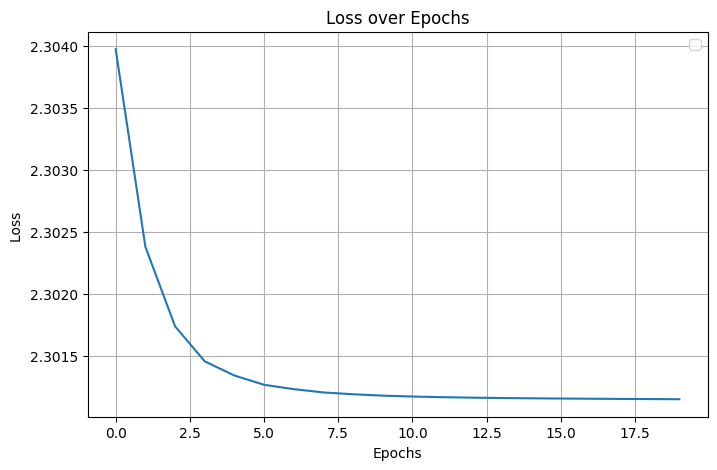

In [23]:
plt.figure(figsize=(8, 5))
plt.plot(costs)
plt.xlabel("Epochs")
plt.ylabel("Loss ")
plt.title("Loss over Epochs")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# import pickle
# model = {
#     "network": network,
#     "weights": weights,
#     "biases": biases
# }

# # Save the model to a file named "model.pkl".
# with open("model.pkl", "wb") as f:
#     pickle.dump(model, f)
